Definitions of wave functions
=============================

In [1]:
from math import pi

def square_wave(x, period=2*pi):
    """Return value of rectangle wave function periodical on [0, `period`] interval."""
    return 1 if x % period < 0.5 * period else -1


def saw_wave(x, period=2*pi):
    """Return value of saw wave function periodical on [0, `period`] interval."""
    # First scale `x` to fit into `[0,2]` interval.
    x = ((x - 0.5 * period) % period) * 2.0 / period
    # Return value of saw wave periodic in `[0,2]`
    return x - 1


def triangle_wave(x, period=2*pi):
    """Return value of triangle wave function periodical on [0, `period`] interval."""
    # First scale `x` to fit into `[0,2]` interval.
    x = ((x - 0.25 * period) % period) * 2.0 / period
    # Return value of triangle wave periodic in `[0,2]`
    return 1 - 2 * x if x < 1 else 2 * x - 3


Plots of square and saw waves
=============================

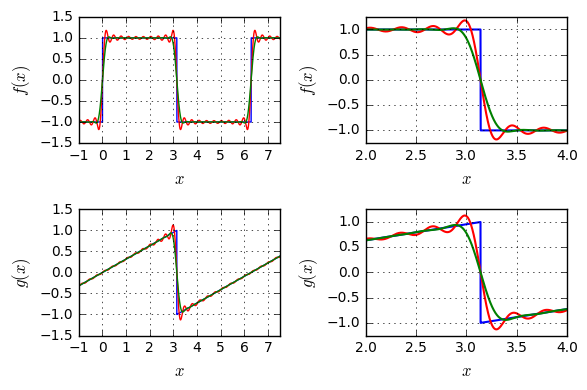

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from lanczos import FourierSeries

N, period = 20, 2 * pi
x_min, x_max = -7.5, 7.5

fig, ((axx, axy), (ayx, ayy)) = plt.subplots(2, 2)
fig.set_facecolor('white')

t = np.arange(x_min, x_max, 0.001)

for subplots, wave in (((axx, axy), square_wave), ((ayx, ayy), saw_wave)):
    s = FourierSeries(wave, N, period)
    for (subplot, linewidth, xlim, ylim) in zip(
        subplots, 
        (1, 1.5), 
        ((-1, 7.5), (2, 4)), 
        ((-1.5, 1.5), (-1.25, 1.25))
    ):
        subplot.plot(t, list(map(wave, t)), linewidth=linewidth)
        subplot.plot(t, list(map(s.evaluate, t)), 'r', linewidth=linewidth)
        subplot.plot(t, list(map(s.lanczos, t)), 'g', linewidth=linewidth)
        
        subplot.set_xlim(xlim)
        subplot.set_ylim(ylim)
        
        subplot.set_xlabel(r'$x$', fontsize=12.0)
        subplot.grid(True)

axx.set_ylabel(r'$f(x)$', fontsize=12.0)
axy.set_ylabel(r'$f(x)$', fontsize=12.0)
ayx.set_ylabel(r'$g(x)$', fontsize=12.0)
ayy.set_ylabel(r'$g(x)$', fontsize=12.0)  

plt.tight_layout()

plt.show()

Let's draw plot from README.md!
===============================

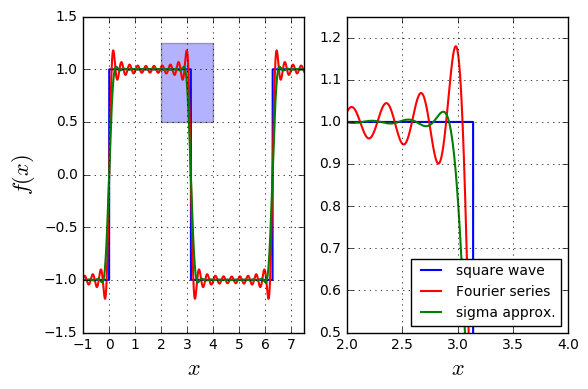

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from lanczos import FourierSeries

linewidth = 1.5
N, period = 20, 2 * pi

fig, (ax, ay) = plt.subplots(1, 2)
fig.set_facecolor('white')

s = FourierSeries(square_wave, N, period)

t = np.arange(x_min, x_max, 0.001)

ax.plot(t, list(map(square_wave, t)), linewidth=linewidth)
ax.plot(t, list(map(s.evaluate, t)), 'r', linewidth=linewidth)
ax.plot(t, list(map(s.lanczos, t)), 'g', linewidth=linewidth)

ax.set_xlabel(r'$x$', fontsize=16.0)
ax.set_ylabel(r'$f(x)$', fontsize=16.0)
ax.set_xlim(-1, 7.5)
ax.set_ylim(-1.5, 1.5)
ax.grid(True)

ay.plot(t, list(map(square_wave, t)), linewidth=linewidth, label='square wave')
ay.plot(t, list(map(s.evaluate, t)), 'r', linewidth=linewidth, label='Fourier series')
ay.plot(t, list(map(s.lanczos, t)), 'g', linewidth=linewidth, label='sigma approx.')

ay.set_xlabel(r'$x$', fontsize=16.0)
ay.set_xlim(2, 4)
ay.set_ylim(0.5, 1.25)
ay.grid(True)

ax.add_patch(
    patches.Rectangle(
        (2.0, 0.5),
        2.,
        0.75,
        fill='blue',
        alpha=0.3
))

handles, labels = ay.get_legend_handles_labels()
plt.legend(handles, labels, fontsize=10., loc='lower right')


plt.tight_layout()

plt.show()

$sinc$ plot
===========

In [51]:
fontsize, linewidth = 14.0, 2.0
x_min, x_max = -7.5, 7.5

t = np.arange(x_min, x_max, 0.001)
x = np.sinc(t)

fig, (ax, ay) = plt.subplots(1, 2)

for subplot in (ax, ay):
    subplot.plot(t, x, linewidth=linewidth)
    subplot.set_xlabel(r'$x$', fontsize=fontsize)
    subplot.grid(True)

ax.set_ylabel(r'$sinc(x)$', fontsize=fontsize)    

ax.set_xlim(x_min, x_max)
ay.set_xlim(-1.0, 1.0)

plt.tight_layout()

plt.show()